# Diffusion Limited aggregation

## Introduction

This problem is based on the Diffusion Limited Aggregation (DLA) model as described on [this page](http://paulbourke.net/fractals/dla/).
Here is an excerpt from the above page, describing the model:
"start with a white image except for a single black pixel in the center. New points are introduced at the borders and randomly (approximation of Brownian motion) walk until they are close enough to stick to an existing black pixel. A typical example of this is shown below in figure 1. If a point, during its random walk, approaches an edge of the image there are two strategies. The point either bounces off the edge or the image is toroidally bound (a point moving off the left edge enters on the right, a point moving off the right edge enters on the left, similarly for top and bottom). In general new points can be seeded anywhere in the image area, not just around the border without any significant visual difference."
Here is a more precise statement of the above description:

Start with a M x M matrix, with all entries as 0 (representing "empty") except for the center cell of the matrix which has a 1 (representing "occupied with a particle").
Choose a cell randomly along the border of the matrix (i.e, along one of its 4 edges), and fill it with a 1. This represents introducing a new particle at the edge of the arena.
Make this particle do a 2D random walk in the empty region of the matrix. In other words, at every iteration, randomly select an empty neighboring cell, and move the particle there, leaving the old cell empty.
Continue the random walk until the particle encounters another particle in an adjacent cell.
The random walk now stops, and the particle remains stuck here forever.
Repeat the above procedure (introducing new particles, random walk, sticking to existing particles) for N particles.
To be clear, only 1 particle does a random walk at a time, and a new one is not introduced until the previous one has found a place to stick to.
Refer to figure 1 on the above page to see an example of what the output of such a simulation looks like.
Next, refer to the definition of "stickiness" as given just above Figure 6.
Refer to Figures 6, 7 and 8 to see the effect of varying stickiness.

## The task

Write code in a language of your choice to simulate DLA for a given value of stickiness. Use a matrix (or "image", as per the above website's language) of at least 500x500 cells (or "pixels"), and at least 50,000 particles to run your DLA simulations. 
Propose an algorithm to estimate the "stickiness" parameter with which a given DLA output was generated.
Extra points if you can support your algorithm with data gathered from your DLA simulations.
Note that the accuracy/robustness of your algorithm is not important. What is important is that your approach seems intuitively correct, and worth exploring.
Further clarification
Here is the task of stickiness estimation:
Assume you don't have access to the program that generated the output. All you are given is the output of a given DLA run using N particles some stickiness k. You have not been given the value of N or k. Estimate k just by analyzing the output that is given to you. The output consists of a 1001x1001 matrix of 0's and 1's, that you know has been generated using DLA.
For simplicity, assume that k can only take values between 1e-3 and 5e-2.
It will be very interesting to see any analysis that you do on DLA outputs to show that the approaches you suggest would work, or not work. To reiterate: it is perfectly fine if the approach(es) you suggest end up being not effective, but it would be very interesting to see any analysis/evidence you can show that tells us how effective your approach is.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product
from scipy.spatial.distance import cdist
%matplotlib inline

## Simulating DLA
Below is the python function that simulates the DLA process.

In [3]:
def spawnRandomParticle(M):
    """ 
    Generated random coordinate on the edge of an MxM matrix

    Parameters:
    M (int)
    Returns:
    tupple
    """
    n = np.random.randint(0,4*M-4)
    if n//((M-1)*2) == 0:
        i,j = (0,n%(M-1)) if (n%((M-1)*2))//(M-1) == 0 else (M-1,M-1-n%(M-1))
    elif n//((M-1)*2) == 1 :
        i,j =  (M-1-n%(M-1),0) if (n%((M-1)*2))//(M-1) == 0 else (n%(M-1), M-1)
    return (i,j)

def simulate_dla(M,N,stickiness):
    """ 
    Siulate a DLA process with given parameters

    Parameters:
    M (int) 
    N (int)
    stickiness (float)
    Returns:
    numpy 2-D array afer simulation
    """
    
    mat = np.zeros((M,M))
    mat[ M//2 , M//2 ] = 1

    nParticles = 0
    while(nParticles < N):

        i,j = spawnRandomParticle(M)
        if (mat[i,j]==1): # if point spawned on occuped cell
            continue

        nParticles += 1
        stick = False

        while(not stick): # random walk
            neighbours = [p for p in list(product([(i-1)%(M-1),i,(i+1)%(M-1)], [(j-1)%(M-1),j,(j+1)%(M-1)])) if p != (i,j)]
            for point in  neighbours: # check if stick
                if mat[point] == 1 :
                    if np.random.uniform(0,1) < stickiness :
                        mat[i,j] = 1
                        stick = True
                        break
                    else :
                        break

            if not stick : # if not stick move to random neighbour that is not occupied
                unoccupied = [ k for k in neighbours if mat[k]!=1]
                i,j = unoccupied[np.random.choice(len( unoccupied  ))]
        
    return mat
    

## Visualizing the affect of stickiness
The objective is to visulise how the distribution of particles differs for different values of stickiness,ceteris paribus. Below I simulate 100 iterations of DLA for $M = 25, N = 100$

In [8]:

M= 25
N = 100
stickies = [0.05,0.2,0.5,1]
np.random.seed(seed=1)
mat_by_stick = {}
for stickiness in stickies:
    mat = np.zeros((M,M))
    for i in range(100):
        mat = mat + simulate_dla(M,N,stickiness)
        if i%20 == 0: 
            print(f"{i} % done for stickiness {stickiness}")
    mat = mat /1000
    mat_by_stick[stickiness] = mat


0 % done for stickiness 0.05
20 % done for stickiness 0.05
40 % done for stickiness 0.05
60 % done for stickiness 0.05
80 % done for stickiness 0.05
0 % done for stickiness 0.2
20 % done for stickiness 0.2
40 % done for stickiness 0.2
60 % done for stickiness 0.2
80 % done for stickiness 0.2
0 % done for stickiness 0.5
20 % done for stickiness 0.5
40 % done for stickiness 0.5
60 % done for stickiness 0.5
80 % done for stickiness 0.5
0 % done for stickiness 1
20 % done for stickiness 1
40 % done for stickiness 1
60 % done for stickiness 1
80 % done for stickiness 1


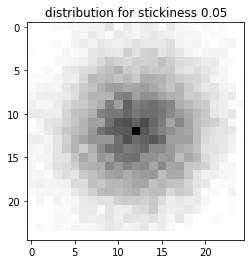

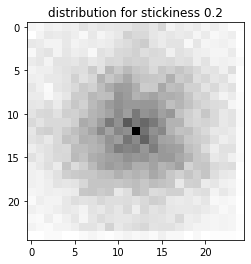

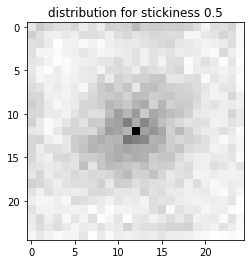

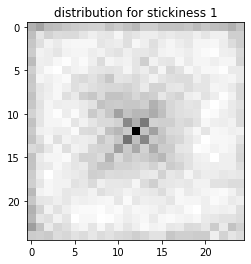

In [10]:
for stickiness in mat_by_stick.keys():
    plt.figure()
    plt.imshow(mat_by_stick[stickiness] , cmap = "binary")
    plt.title(f"distribution for stickiness {stickiness}")


### Observations -
For low stickiness - the distribution of particles is denser and more centred around the centre particle. This seems to be the key difference in distribution of the particles for different stickiness pria facie. This is also corroborated by paul's observation that lesser degree of stickiness causes the pattern to be more hairy i.e. points are more densely located within the image. 

Let us look at a few patterns and inter-particle distance distributions to confirm this hypothesis


Text(0.5, 1.0, 'Pattern for stickiness 0.5')

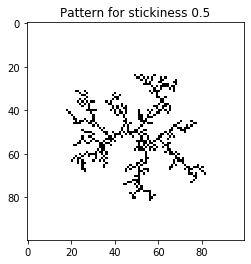

In [118]:

M= 100
N = 500
mat = simulate_dla(M,N,0.5)
plt.imshow(mat , cmap = "binary")
plt.title("Pattern for stickiness 0.5")

Text(0.5, 1.0, 'Distribution of inter-particle distance for stickiness = 0.5')

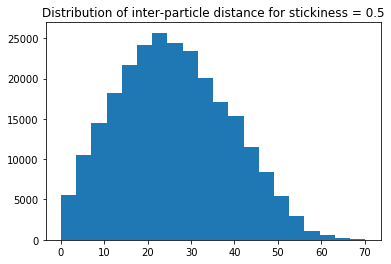

In [119]:
part_cord = np.nonzero(mat)
dist_mat = cdist(np.column_stack(part_cord) , np.column_stack(part_cord))
plt.hist(dist_mat.reshape( (dist_mat.shape[0]**2,) ), bins = 20)
plt.title("Distribution of inter-particle distance for stickiness = 0.5")

In [120]:
print(f" Average inter particle distance for stickiness 0.5 is {np.mean(dist_mat)}")

 Average inter particle distance for stickiness 0.5 is 26.023989240842706


Text(0.5, 1.0, 'Pattern for stickiness 1')

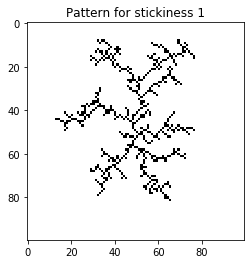

In [122]:

M= 100
N = 500

mat = simulate_dla(M,N,1)
plt.imshow(mat , cmap = "binary")
plt.title("Pattern for stickiness 1")


Text(0.5, 1.0, 'Distribution of inter-particle distance for stickiness = 1')

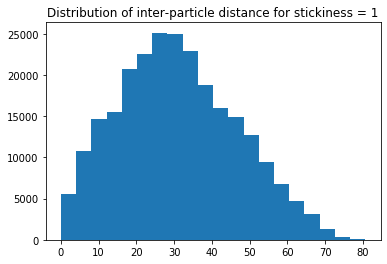

In [123]:
part_cord = np.nonzero(mat)
dist_mat = cdist(np.column_stack(part_cord) , np.column_stack(part_cord))
plt.hist(dist_mat.reshape( (dist_mat.shape[0]**2,) ), bins = 20)
plt.title("Distribution of inter-particle distance for stickiness = 1")

In [124]:
print(f" Average inter particle distance for stickiness 1 is {np.mean(dist_mat)}")

 Average inter particle distance for stickiness 1 is 31.00309265849222


It follows heuristically and from the numbers above that a DLA simulation using a lower value for stickiness will have a lower Average Inter Particle Distance(AIPD), at least in an expected sense. To see how the distribution of average AIPD looks for a given value of M,N and stickiness - lets simulate enough DLAs for a few values of stickiness.

Although there are many other fetures we could use to represent the distribution of particles, in the interest of time and simplicity - the AIPD is used as a representative of the particle distribution. 

To see how the distribution of average AIPD looks for a given value of M,N and stickiness - lets simulate enough DLAs for a few values of stickiness.

## Estimating distribution of AIPD

In [83]:
M= 100
N = 500
iterations = 100
stickiness = [0.05,0.1, 0.2,0.5]

metric_dict = { s:[] for s in stickiness }
metrics = ["average", "25th", "Median", "75th"]
for stick in stickiness:
    for i in range(iterations):
        mat = simulate_dla(M,N,stick)
        part_cord = np.nonzero(mat)
        dist_mat = cdist(np.column_stack(part_cord) , np.column_stack(part_cord))
        metric_dict[stick].append(np.append(np.mean(dist_mat) , np.percentile(dist_mat , [25,50,75])))
        if i%20 == 0: 
            print(f"{i} % done for stickiness {stick}")
    

0 % done for stickiness 0.05
20 % done for stickiness 0.05
40 % done for stickiness 0.05
60 % done for stickiness 0.05
80 % done for stickiness 0.05
0 % done for stickiness 0.1
20 % done for stickiness 0.1
40 % done for stickiness 0.1
60 % done for stickiness 0.1
80 % done for stickiness 0.1
0 % done for stickiness 0.2
20 % done for stickiness 0.2
40 % done for stickiness 0.2
60 % done for stickiness 0.2
80 % done for stickiness 0.2
0 % done for stickiness 0.5
20 % done for stickiness 0.5
40 % done for stickiness 0.5
60 % done for stickiness 0.5
80 % done for stickiness 0.5


In [110]:
results = np.column_stack([np.row_stack([ np.row_stack(x) for x in metric_dict.values() ]), np.repeat(stickiness,iterations)])

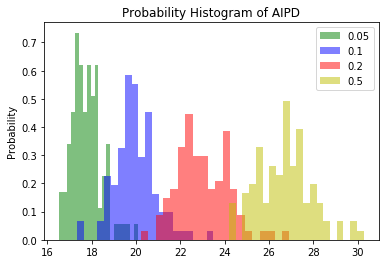

In [131]:
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)

x1 = results[:100,0]
x2 = results[100:200,0]
x3 = results[200:300,0]
x4 = results[300:400,0]
# Plot
plt.hist(x1, **kwargs, color='g', label='0.05')
plt.hist(x2, **kwargs, color='b', label='0.1')
plt.hist(x3, **kwargs, color='r', label='0.2')
plt.hist(x4, **kwargs, color='y', label='0.5')
plt.gca().set(title='Probability Histogram of AIPD', ylabel='Probability')
plt.legend();

Clearly the AIPD distribution is very diffrent for different values of stickiness. Consequently, given the result of a DLA simulation, there is information about the stickiness parameter that can be extracted from the AIPD. This forms they key underpinning of the algorithm proposed below.

### Proposed algorithm
1. Calculate $M$ and $N$ from the matrix. $M$ is the dimension of the matrix and $N$ is the number of non zero entries minus one.
2. Caculate the average eucledian distance between particles(non zero points in matrix). Lets call this $y$. This is the AIPD for the observed matrix.
3. Let the stickiness parameter used to generate the given matrix be $\theta$
4. For the given $M$ and $N$, simulate a large number of DLA processes using a set of candidate values of $\theta$. Let's call this set $S$. In the above demostration , $S = \{0.05,0.1,0.2,0.5\}$ 
5. From these estiamte the distribution of AIPD given each candidate value of $\theta$ using repeated DLA simulations
5. Choose $\hat\theta$ among the candidate values of $\theta$ such that $p(y|\theta)$ is maximised, which is both the MLE and the MAP estimate in case uniform prior is assumed for $\theta$